## [[GIS] 공간정보 데이터의 구성 및 기본 이해하기](https://yganalyst.github.io/spatial_analysis/spatial_analysis_1/)

### GIS data
위치정보를 포함하고 있는 데이터는 크게 Vector와 Raster가 있다.  Raster는 우리가 흔히 아는 이미지 형태의 데이터 이고, Vector는 대표적인 세 가지 유형의 데이터가 있다.
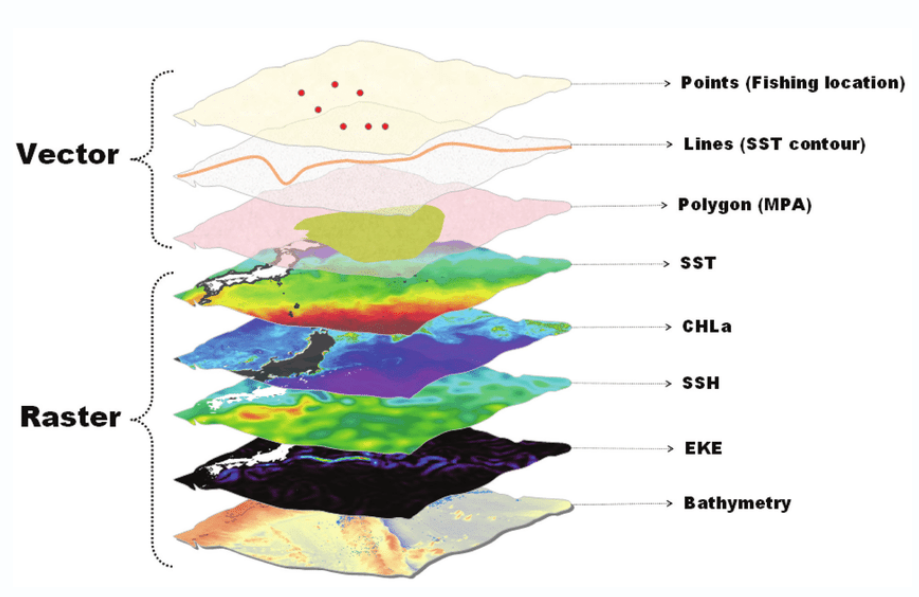

- Point(점) : 주로 어떤 도시기반시설, 건물, 교차로(node) 등을 나타낼 때 사용한다.
- Line(선) : 주로 도로, 경로, 네트워크, 어떤 면의 중심선, 철도 등을 나타낼 때 사용한다.
- Polygon(다각형) : 주로 어떤 지역, 군, 영역등을 나타낼 때 사용한다.

### Geopandas
geopandas는 pandas와 유사한 라이브러리로, 공간정보를 가진 데이터프레임을 다루는데 유용한 패키지로 가장많이 활용한다.
pandas와 마찬가지로 GeoSeries, GeoDataFrame의 타입으로 다루며 function이나 attribute들도 큰 차이가 없다.

### 1. 공간 데이터 생성

Geopandas는 내부적으로 shapely라는 패키지를 사용하여 공간 정보를 처리한다.

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

In [2]:
x1 ,y1 = 1,2
x2, y2 = 2,2
x3, y3 = 2,3
x4, y4 = 1,3

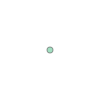

In [3]:
Point([x1, y1])

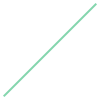

In [4]:
LineString([(x1, y1), (x3, y3)])

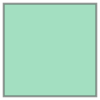

In [7]:
Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

**주의할 점은 Polygon의 좌표들에는 순서가 존재한다는 것이다.**

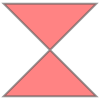

In [8]:
Polygon([(x1, y1), (x2, y2), (x4, y4), (x3, y3)])

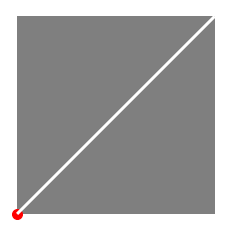

Point
LineString
Polygon


In [27]:
import matplotlib.pyplot as plt

point = Point([x1,y1])
line = LineString([(x1,y1),(x3,y3)])
polygon = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

ax = gpd.GeoSeries(polygon).plot( color='black', alpha=.5)
gpd.GeoSeries(line).plot(ax=ax, linewidth=3, color = 'white')
gpd.GeoSeries(point).plot(ax=ax, color = 'red', markersize=100)

plt.axis('off') # 축 제거
plt.show()

print(point.geom_type) # 공간 객체 타입
print(line.geom_type)
print(polygon.geom_type)

In [30]:
print(gpd.GeoSeries(polygon))
print(gpd.GeoSeries(line))
print(gpd.GeoSeries(point))

0    POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....
dtype: geometry
0    LINESTRING (1.00000 2.00000, 2.00000 3.00000)
dtype: geometry
0    POINT (1.00000 2.00000)
dtype: geometry


### 2. 외부 데이터 사용

#### 2-1. 공간 데이터의 형태

- Point: [서울특별시 소방서 위치정보](http://data.seoul.go.kr/dataList/OA-12740/S/1/datasetView.do) (EPSG: WGS1984)
- Polygon: [서울특별시 행정경계 법정동](http://data.nsdi.go.kr/dataset) (EPSG:5179)

Polygon의 경우 GIS 데이터는 shapefile이라고 하는데 이는 하나의 파일이 아니라 3개 이상의 확장 포맷을 통틀어 부른다. dbf,prj,shp,shx의 확장자를 가지고 있다.

#### 2-2. 공간데이터 시각화

In [65]:
import pandas as pd

seoul_area = gpd.GeoDataFrame.from_file('data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')
pt_119 = pd.read_csv('data/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv', encoding='cp949')

In [66]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [67]:
pt_119.head()

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145
3,3,1106102,이촌119안전센터,37.527841,126.958318
4,4,1106104,후암119안전센터,37.544896,126.981242


shp파일을 geopandas를 이용해서 바로 읽었을때, Geometry컬럼에 각 구에 해당하는 Polygon 정보가 들어있는 것을 확인할 수 있다.  
하지만 소방안전센터의 경우 단순 데이터프레임 이므로 위도와 경도 좌표를 이용해서 공간데이터로 만들어 주어야 한다.

In [68]:
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row: Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry')

pt_119.head()

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.86945 37.52716)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.09647 37.61025)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.01714 37.48777)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (126.95832 37.52784)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (126.98124 37.54490)


#### 2-3. 좌표정의 및 변환

공간데이터를 다룰때는 좌표계를 이해하는것이 상당히 중요하다. 서로 다른 데이터의 좌표계를 통일 시키거나 변환할때는, 먼저 해당 데이터가 정의된 좌표계가 어떤 것인지 알아야 한다.

대표적으로 위경도, 미터좌표계가 있는데 국내에서는 주로 아래 좌표계를 사용한다.

1. EPSG4326(WGS84) : 위경도, 기본좌표계
1. EPSG5179(TM) : 미터 좌표계
1. EPSG5174(TM) : 미터 좌표계
1. EPSG5181(TM) : 미터 좌표계

**데이터를 받아올때 꼭 어떤 좌표계로 만들어진 데이터 인지를 확인해야 그 데이터를 활용할 수 있다.(좌표계를 모르면 못쓰는 데이터라고 해도 무방하다.)**

좌표계 확인 및 정의는 .crs인자로, 변환은 .to_crs인자로 가능하다.

In [69]:
print(seoul_area.crs)
print(pt_119.crs)

None
None


In [70]:
seoul_area.crs = {'init': 'epsg:5179'}
pt_119.crs = {'init': 'epsg:4326'}

C:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [71]:
print(seoul_area.crs)
print(pt_119.crs)

+init=epsg:5179 +type=crs
+init=epsg:4326 +type=crs


두 데이터 모두 좌표가 정의 되었으므로, 이제 하나의 좌표로 통일 시켜보자.  
일반적으로 미터 단위를 분석을 진행해야 하기 때문에 epsg5179로 변환해주자.

In [72]:
pt_119 = pt_119.to_crs({'init':'epsg:5179'})

C:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


두 데이터를 모두 시각화 하면,

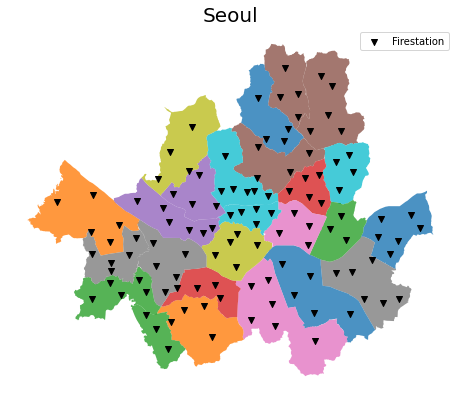

In [76]:
ax = seoul_area.plot(column = 'SGG_NM', figsize=(8,8), alpha=.8)
pt_119.plot(ax=ax, marker='v', color = 'black', label='Firestation')
ax.set_title('Seoul', fontsize=20)
ax.set_axis_off() # 축 제거
plt.legend()
plt.show()